# Dimoglobin adsorption
(From Phillips et al. paragraph 7.3)

In the problem, we have $N$ oxygen molecules, which can be distributed over $\Omega$ sites, or bind to one of two binding sites on dimoglobin. The expectation value of the number of bound molecules can be calculated to be
\begin{align*}
\left\langle N_\mathrm{bound} \right\rangle &= \frac{\frac{N}{\Omega} e^{-\beta \Delta \varepsilon} + 2\frac{N^2}{\Omega^2}e^{-\beta (2\Delta \varepsilon + \varepsilon_2)}}{1 + \frac{N}{\Omega} e^{-\beta \Delta \varepsilon} + \frac{N^2}{\Omega^2}e^{-\beta (2\Delta \varepsilon + \varepsilon_2)}}.
\end{align*}

In [1]:
# Python libraries
%reset -f
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', size=12)
#plt.rc('font', family='arial') # Not working?
plt.rc('axes', titlesize=16)
from scipy.optimize import fsolve

In [17]:
# The expected number of bound oxygen molecules, with x = N / Omega.
def Nbound(x, deltae, e2):
    return (2*x*np.exp(-deltae) + 2 * x * x * np.exp(-2*deltae - e2)) / (1 + 2*x*np.exp(-deltae) + x * x * np.exp(-2*deltae - e2))

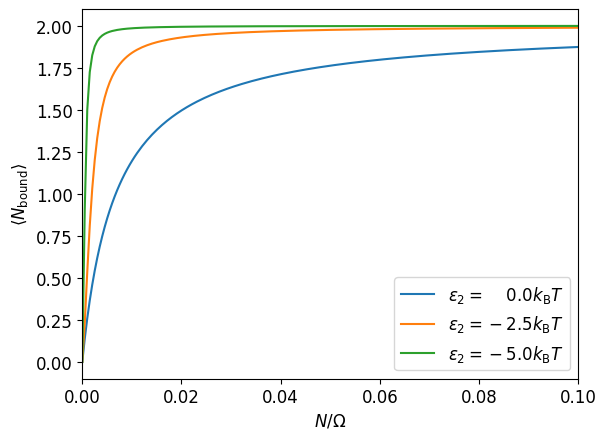

In [16]:
# Plot the expectation value of Nbound
x = np.linspace(0,.1,200)
#plt.figure(figsize=(4,2))
#plt.figure(figsize=(18,6)) # NB: Size in inches.
#plt.subplot(1,3,1)
plt.plot(x, Nbound(x, -5, 0), x, Nbound(x, -5, -2.5), x, Nbound(x, -5, -5))
plt.xlim(0,.1)
#plt.ylim(0,3)
plt.xlabel('$N/\Omega$')
plt.ylabel('$\left\langle N_\mathrm{bound} \\right\\rangle$')
#plt.axhline(y = 0, color = 'k', linestyle = ':')
#plt.axvline(x = 0, color = 'k', linestyle = ':')
plt.legend(['$\\varepsilon_2 = \;\quad 0.0 k_\mathrm{B}T$', '$\\varepsilon_2 = -2.5 k_\mathrm{B} T$', '$\\varepsilon_2 = -5.0 k_\mathrm{B} T$'])
plt.savefig("dimoglobinbindingexpectation.pdf", format="pdf", bbox_inches="tight")

In [18]:
# The probabilities of the three states
def p0(x, deltae, e2): return 1 / (1 + 2*x*np.exp(-deltae) + x * x * np.exp(-2*deltae - e2))
def p1(x, deltae, e2): return 2*x*np.exp(-deltae) / (1 + 2*x*np.exp(-deltae) + x * x * np.exp(-2*deltae - e2))
def p2(x, deltae, e2): return x * x * np.exp(-2*deltae - e2) / (1 + 2*x*np.exp(-deltae) + x * x * np.exp(-2*deltae - e2))

In [35]:
# Plot the probabilities
x = np.arange(0.0001,.1,0.0001)
#plt.figure(figsize=(4,2))
#plt.figure(figsize=(18,6)) # NB: Size in inches.
#plt.subplot(1,3,1)
fig, ax = plt.subplots(1,1)
ax.semilogx(x, p0(x, -5, -2.5), x, p1(x, -5, -2.5), x, p2(x, -5, -2.5))
#fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
#ax1.semilogx(x, p0(x, -5, 0), x, p1(x, -5, 0), x, p2(x, -5, 0))
#ax2.semilogx(x, p0(x, -5, -2.5), x, p1(x, -5, -2.5), x, p2(x, -5, -2.5))
#ax3.semilogx(x, p0(x, -5, -5), x, p1(x, -5, -5), x, p2(x, -5, -5))
#ax4.semilogx(x, p0(x, -5, -5), x, p1(x, -5, -5), x, p2(x, -5, -5))
#plt.title('Hare / lynx population dynamics')
#plt.xlim(0,.1)
#plt.ylim(-0.02,0.02)
plt.xlabel('$N/\Omega$')
plt.ylabel('probability')
plt.legend(['$p_0$', '$p_1$', '$p_2$'])
#plt.xscale('log')
#plt.axhline(y = 0, color = 'k', linestyle = ':')
#plt.axvline(x = 0, color = 'k', linestyle = ':')
plt.savefig("dimoglobinoccupancyprobability.pdf", format="pdf", bbox_inches="tight")